### Train all ML model using MOM6 data

In [1]:
import sys
sys.path.append('../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

In [2]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/'
L = 'all'

In [3]:
ML_data = datasets.MOM6_all_transformer('-', 'all')

In [4]:
ML_data.read_datatree(MOM6_bucket)
ML_data.generate_test_train_batches()

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_50km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_100km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_200km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_400km.zarr
Subsampling
Computed and saved norm nc for all.
Test and train batches split. Number of batches: 37-5


In [6]:
# Setup ML model
ANN_model = ML_classes.ANN(shape=[36,36,2],num_in = len(ML_data.input_channels))
regress_sys = ML_classes.RegressionSystem(ANN_model)

regress_sys.train_system(ML_data, 201)

Train loss step 0:  0.7756187851364548 test loss: 0.506431233882904
Train loss step 20:  0.24585471644594864 test loss: 0.22053235173225402
Train loss step 40:  0.24035086945907488 test loss: 0.2161876767873764
Train loss step 60:  0.23657389871172002 test loss: 0.21188089549541472
Train loss step 80:  0.23089281489720215 test loss: 0.21068204045295716
Train loss step 100:  0.22836874989238945 test loss: 0.20551675260066987
Train loss step 120:  0.22659513918129173 test loss: 0.20294272303581237
Train loss step 140:  0.22551192302961606 test loss: 0.202501979470253
Train loss step 160:  0.22486151553489067 test loss: 0.2020873486995697
Train loss step 180:  0.22449749265168165 test loss: 0.20128757357597352
Train loss step 200:  0.2242265484623007 test loss: 0.2013544887304306


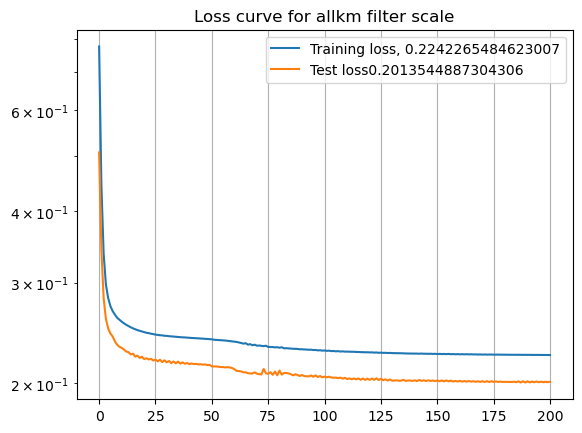

In [7]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

In [8]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_'+L+'_MOM6_P2L_36_36'#+'_'+str(bias)
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_'+L+'_36_36.nc'
regress_sys.save_weights_nc(model_nc)